In [1]:
from functions import *


Using TensorFlow backend.


In [2]:
# =========== load dataset =========== #
fldr = '../datasets/dogs_cats/'
dataset = PrepareData(fldr).run()
X_train = dataset['X_train']
X_test = dataset['X_test']
y_train = dataset['Y_train']
y_test = dataset['Y_test']
# path to save predictions after each type of training
savepath = './results/'
# list to store each training history
histories = []
# list to store name of training
names = []


  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:10<00:10, 10.25s/it]

100%|██████████| 2/2 [00:20<00:00, 10.18s/it]

X train shape: (20000, 64, 64, 3)

Y train shape: (20000, 1)

  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:02<00:02,  2.48s/it]

100%|██████████| 2/2 [00:04<00:00,  2.49s/it]

X test shape: (5000, 64, 64, 3)

Y test shape: (5000, 1)

In [3]:
# =========== reshape dataset to the shape suitable for training =========== #
# shapes before reshaping
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# reshape dataset
dataset = reshape_data(X_train, y_train, X_test, y_test, savepath)
# shapes after reshaping
X_train = dataset['X_train'].copy()
X_test = dataset['X_test'].copy()
y_train = dataset['y_train'].copy()
y_test = dataset['y_test'].copy()
print(X_train.shape, 
      y_train.shape,
      X_test.shape,
      y_test.shape,)


(20000, 64, 64, 3)

(20000, 1)

(5000, 64, 64, 3)

(5000, 1)

(20000, 64, 64, 3)

(20000, 2)

(5000, 64, 64, 3)

In [4]:
# =========== train, predict, save and store =========== #
# train model, get and save predictions to the savepath folder
# return learning history and name of the "trained dataset"
cur_history, name = train_predict(dataset, savepath, 'MNIST', verb=0)
# store learning history to the list
histories.append(cur_history)
# store name to the list 
names.append(name)


MNIST accurancy: 0.896

In [5]:
# =========== extract features from original images =========== #
feat_train_data, feat_test_data = extr_feat(dataset)


  0%|          | 0/20000 [00:00<?, ?it/s]

 21%|██        | 4189/20000 [00:00<00:00, 41887.54it/s]

 42%|████▏     | 8418/20000 [00:00<00:00, 42006.74it/s]

 64%|██████▍   | 12898/20000 [00:00<00:00, 42806.76it/s]

 80%|███████▉  | 15924/20000 [00:00<00:00, 38070.27it/s]

 97%|█████████▋| 19444/20000 [00:00<00:00, 37160.55it/s]

100%|██████████| 20000/20000 [00:00<00:00, 38533.43it/s]

Total Non NaN values: 8760000

Total NaN values: 0

(20000, 426)

  0%|          | 0/5000 [00:00<?, ?it/s]

 82%|████████▏ | 4079/5000 [00:00<00:00, 40787.71it/s]

100%|██████████| 5000/5000 [00:00<00:00, 40648.15it/s]

Total Non NaN values: 2190000

Total NaN values: 0

(5000, 426)

In [6]:
# =========== reshape features to image shape and concatenate with them =========== #
# reshape to image shape
X_train_feat, X_test_feat = reshape_as_orig(feat_train_data, 
                                            feat_test_data, 
                                            dataset)
# stack new features array to original image dataset as additional "depth" layer 
X_train_2 = np.concatenate([X_train, X_train_feat], axis=-1)
X_test_2 = np.concatenate([X_test, X_test_feat], axis=-1)


In [7]:
# ====== train miniVGG with original data concatenated with new features ====== #
# update dataset to train with VGG model
dataset['X_train'] = X_train_2
dataset['X_test'] = X_test_2
dataset['train_shape'][-1] = dataset['train_shape'][-1] + 1
dataset['test_shape'][-1] = dataset['test_shape'][-1] + 1
# train, predict, save results
cur_history, name = train_predict(dataset, savepath, 'MNIST_feat', verb=0)
histories.append(cur_history)
names.append(name)


MNIST_feat accurancy: 0.89

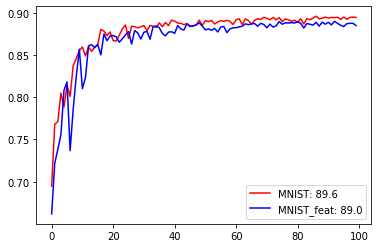

In [8]:
# ====== plot training histories, read predictions from csv and store them to the list ====== #
colors = ['r', 'b']
for n in range(len(names)):    
    plt.plot(np.arange(len(histories[n])),
             histories[n],
             c=colors[n],
             label=names[n] + ': ' + str(np.round(np.max(histories[n])*100, 2)))
plt.legend()


In [9]:
# ====== read predictions, average them and get better accuracy ====== #
predictions = []
# read predictions from csv files and store them to "predictions" list
for n in range(len(names)):
    predictions.append(pd.read_csv(savepath + 'cur_pred_'
                                   + str(names[n]) + '.csv').values)

# average to predictions
average_pred = (predictions[0] + predictions[1])/2
# find the most probable class for each image
average_pred = np.argmax(average_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
# calculate accuracy for averaged predictions
acc = accuracy_score(average_pred, y_test)
print(acc)


0.8988